# RK4 Stability condition

We are looking for RK4 stability condition in the litterature we found that using the stability function of RK4 $R$ defined as
$$R(z)= 1+z +\frac{z^2}{2} +\frac{z^3}{6}+\frac{z^4}{24}. $$

We have that $$\forall n \geq 0, \ \ y_{n+1} = R(dt J) y_n, $$
with $J$ the jacobian and $dt$ the time step used in the method.

## Imports 

In [1]:
import sys
sys.path.append('../Euler')
sys.path.append('../RK')
sys.path.append('../Parareal')
sys.path.append('../Stormer')
sys.path.append('../Problems')

import matplotlib.pyplot as plt
import numpy as np
import parareal as para
import HamiltonianFunctions as func
import RK4 as RK4
import RK2 as RK2
import StrongVariableMagneticField as SVMF
import random as rd

## Constants

In [2]:
s = 0
eps =0.01
T = 500*eps
N = 8
delta_t = T/N
dt= 0.625

## Computation and plot of the condition

m 0


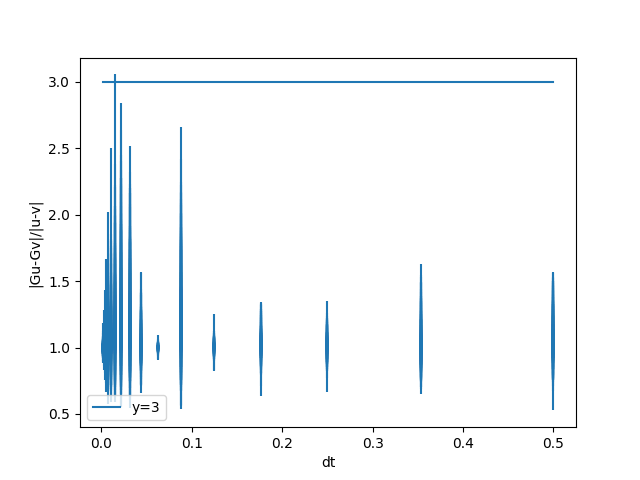

In [6]:
%matplotlib widget

for m in range(100):
    u =np.array([rd.random(),rd.random(),rd.random(),rd.random(),rd.random(),rd.random()])
    #print(f"norm u", np.linalg.norm(1+u+u**2/2+u**3/6+u**4/24))
    tab_v = np.zeros((4,6))

    for k in range(4):

        w = np.array([rd.random(),rd.random(),rd.random(),rd.random(),rd.random(),rd.random()])
        tab_v[k] = w
    
    
        
    tab_dt  = np.array([2**(-k/2) for k in range(2,20)])
    err = np.zeros((len(tab_dt),4))

    k = 0
    if not m%100:
        print("m",m)
    for dt in tab_dt:
        n = 0

        for v in tab_v:
            jacob = SVMF.jacobienne(v[:3],v[3:])
            while np.linalg.norm(np.eye(6)+dt*jacob+dt**2*jacob@jacob/2+dt**3*jacob@jacob@jacob/6+dt**4*jacob@jacob@jacob@jacob/24)>2.7:
                #print(np.linalg.norm(np.eye(6)+dt*jacob+dt**2*jacob@jacob/2+dt**3*jacob@jacob@jacob/6+dt**4*jacob@jacob@jacob@jacob/24))
                v =np.array([rd.random(),rd.random(),rd.random(),rd.random(),rd.random(),rd.random()])
                jacob = SVMF.jacobienne(v[:3],v[3:])


            Gu = SVMF.approx(s,s+dt,u,dt,eps)
            Gv = SVMF.approx(s,s+dt,v,dt,eps)
            err[k,n] = np.linalg.norm(Gu-Gv)/np.linalg.norm(u-v)

            n+=1
        k+=1
    
    for l in range(4):
        if max(err[:,l]) > 6:
            plt.loglog(tab_dt, err[:,l],'x',label=f"v{l}")
            print("v:",tab_v[l],"u:",u)
    C = 10    
    #plt.plot(tab_dt, 1+10*tab_dt,label=f"1+{C}dt")

    for l in range(len(tab_dt)):
        plt.vlines(tab_dt[l],ymin=np.amin(err[l]),ymax=np.amax(err[l]))
plt.plot(tab_dt, 3*np.ones(len(tab_dt)), label="y=3")
plt.xlabel('dt')
plt.ylabel('|Gu-Gv|/|u-v|')
plt.legend()

## Tests on the initial conditions used

2458.351863220111


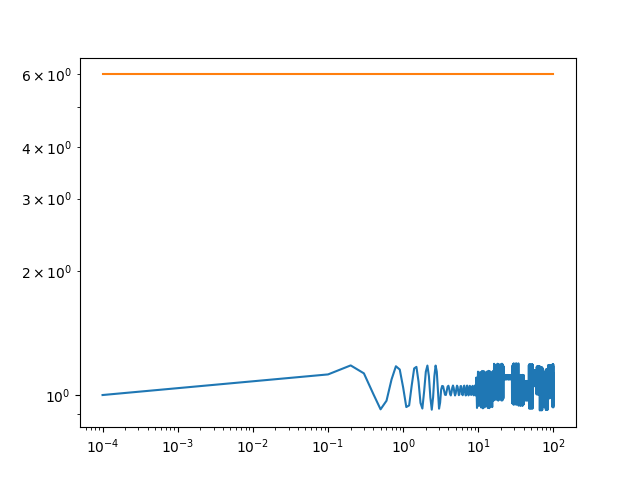

In [5]:
%matplotlib widget
x,v = [0,1,1],[1,eps,0]
vect = np.concatenate((x,v))
u = np.array([rd.random(),rd.random(),rd.random(),rd.random(),rd.random(),rd.random()])

#print(np.linalg.norm(np.eye(6)+dt*jacob+dt**2*jacob@jacob/2+dt**3*jacob@jacob@jacob/6+dt**4*jacob@jacob@jacob@jacob/24))
err = []
jacob = SVMF.jacobienne(x,v) 
for dt in np.linspace(0.0001,10,1000):
    Gx = SVMF.approx(s,s+dt,vect,delta_t,eps)
    Gu = SVMF.approx(s,s+dt,u,delta_t,eps)

    err.append(np.linalg.norm(Gu-Gx)/np.linalg.norm(u-vect))
    #print("Condition on R",np.linalg.norm(np.eye(6)+dt*jacob+dt**2*jacob@jacob/2+dt**3*jacob@jacob@jacob/6+dt**4*jacob@jacob@jacob@jacob/24) ,"dt",dt)
plt.loglog(np.linspace(0.0001,100,1000),err)
plt.loglog(np.linspace(0.0001,100,1000),6*np.ones(1000))
